# Read-in the Data

Let's begin with read-in the data file.

This data is about the populations in each year. 

We can read the file one line at a time and split each line using tab as a delimiter. Each row is added as a list to a table (in this case a list of lists).

In [25]:
my_data = open('./data/populations.txt', 'r')

In [26]:
labels_line = my_data.readline().strip()
poptable = []
total = 0
for line in my_data.readlines():
    line = line.strip()
    row = line.split("\t")
    record = [int(row[0]),float(row[1]),float(row[2]), float(row[3])]
    print (record)
    poptable.append(record)
    total += 1
print (total)

[1900, 30000.0, 4000.0, 48300.0]
[1901, 47200.0, 6100.0, 48200.0]
[1902, 70200.0, 9800.0, 41500.0]
[1903, 77400.0, 35200.0, 38200.0]
[1904, 36300.0, 59400.0, 40600.0]
[1905, 20600.0, 41700.0, 39800.0]
[1906, 18100.0, 19000.0, 38600.0]
[1907, 21400.0, 13000.0, 42300.0]
[1908, 22000.0, 8300.0, 44500.0]
[1909, 25400.0, 9100.0, 42100.0]
[1910, 27100.0, 7400.0, 46000.0]
[1911, 40300.0, 8000.0, 46800.0]
[1912, 57000.0, 12300.0, 43800.0]
[1913, 76600.0, 19500.0, 40900.0]
[1914, 52300.0, 45700.0, 39400.0]
[1915, 19500.0, 51100.0, 39000.0]
[1916, 11200.0, 29700.0, 36700.0]
[1917, 7600.0, 15800.0, 41800.0]
[1918, 14600.0, 9700.0, 43300.0]
[1919, 16200.0, 10100.0, 41300.0]
[1920, 24700.0, 8600.0, 47300.0]
21


In [27]:
print (poptable)

[[1900, 30000.0, 4000.0, 48300.0], [1901, 47200.0, 6100.0, 48200.0], [1902, 70200.0, 9800.0, 41500.0], [1903, 77400.0, 35200.0, 38200.0], [1904, 36300.0, 59400.0, 40600.0], [1905, 20600.0, 41700.0, 39800.0], [1906, 18100.0, 19000.0, 38600.0], [1907, 21400.0, 13000.0, 42300.0], [1908, 22000.0, 8300.0, 44500.0], [1909, 25400.0, 9100.0, 42100.0], [1910, 27100.0, 7400.0, 46000.0], [1911, 40300.0, 8000.0, 46800.0], [1912, 57000.0, 12300.0, 43800.0], [1913, 76600.0, 19500.0, 40900.0], [1914, 52300.0, 45700.0, 39400.0], [1915, 19500.0, 51100.0, 39000.0], [1916, 11200.0, 29700.0, 36700.0], [1917, 7600.0, 15800.0, 41800.0], [1918, 14600.0, 9700.0, 43300.0], [1919, 16200.0, 10100.0, 41300.0], [1920, 24700.0, 8600.0, 47300.0]]


In [28]:
# printing the top5 elements (rows) of poptable from index 0 upto (but not including) index 5
print (poptable[0:5])

[[1900, 30000.0, 4000.0, 48300.0], [1901, 47200.0, 6100.0, 48200.0], [1902, 70200.0, 9800.0, 41500.0], [1903, 77400.0, 35200.0, 38200.0], [1904, 36300.0, 59400.0, 40600.0]]


# Define the Data

Following is an example of creating Python dictionaries for each of the species in the data. The year (in the first) column is used as the key for the population value of each of the species for that year.

In [29]:
hares = {}
lynxes = {}
carrots = {}
for row in poptable:
    hares[row[0]] = row[1]
    lynxes[row[0]] = row[2]
    carrots[row[0]] = row[3]


In [30]:
print(hares)

{1900: 30000.0, 1901: 47200.0, 1902: 70200.0, 1903: 77400.0, 1904: 36300.0, 1905: 20600.0, 1906: 18100.0, 1907: 21400.0, 1908: 22000.0, 1909: 25400.0, 1910: 27100.0, 1911: 40300.0, 1912: 57000.0, 1913: 76600.0, 1914: 52300.0, 1915: 19500.0, 1916: 11200.0, 1917: 7600.0, 1918: 14600.0, 1919: 16200.0, 1920: 24700.0}


This is useful if we need to access information regarding one of the species for a specified year.

In [31]:
print (hares[1903])

77400.0


In [32]:
# finding the years during which the population of hares was greater than 50K
# Here we'll use standard Python list comprehensions

hares_above_50k = [yr for yr in hares.keys() if hares[yr]>50000.0]
print (hares_above_50k)

[1902, 1903, 1912, 1913, 1914]


In [40]:
# Finding the year(s) with maximal value of Hares

maxhares = [yr for yr in hares.keys() if hares[yr] == max(hares.values())]
for i in range(0,len(maxhares)):
    print (maxhares[i], hares[maxhares[i]])


1903 77400.0


So far, we have not used Numpy, only standard Python. But, many operations on data involving tables or matrices are much simpler and more efficient using Numpy. Let's now try using NumPy arrays:

In [41]:
import numpy as np

If we want to use the Python list already created, we must first convert it to a 2D NumPy array:

In [42]:
pop = np.array(poptable)
print (pop)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


However, we could have, from the start, loaded the data into a Numpy array. One way to do this is via "loadtxt" which reads numerical values from tab-delimited or CSV files (converted into floats).

In [44]:
poptable = np.loadtxt('./data/populations.txt', skiprows=1)
print (poptable)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [45]:
poptable.shape

(21, 4)

Note that poptable is a 21x4 2-d Numpy array (a matrix)
In fact, we can assign each column directly into separate 1-d arrays, by splitting the transpose of poptable:

In [46]:
year, hares, lynxes, carrots = poptable.T
print (year)
print (hares)
print ("Mean Hare Population: ", hares.mean())

[1900. 1901. 1902. 1903. 1904. 1905. 1906. 1907. 1908. 1909. 1910. 1911.
 1912. 1913. 1914. 1915. 1916. 1917. 1918. 1919. 1920.]
[30000. 47200. 70200. 77400. 36300. 20600. 18100. 21400. 22000. 25400.
 27100. 40300. 57000. 76600. 52300. 19500. 11200.  7600. 14600. 16200.
 24700.]
Mean Hare Population:  34080.95238095238


Numpy allows us to easily perform operations on rows, columns, or to the whole array:

# Data Exploration with Numpy

In [47]:
# finding all years when the population of one of the species is above 50k

above_50k = np.any(poptable>50000, axis=1) # axis=1 means the operation will be performed across columns
print (above_50k)
print (year[above_50k])


[False False  True  True  True False False False False False False False
  True  True  True  True False False False False False]
[1902. 1903. 1904. 1912. 1913. 1914. 1915.]


Let's print some summary statistics on each of the species:

In [49]:
pop_no_year = poptable[:,1:] # Removing the first column ("Year")
print ("        Hares           Lynxes          Carrots")
print ("Mean:", pop_no_year.mean(axis=0))
print ("Std: ", pop_no_year.std(axis=0))

        Hares           Lynxes          Carrots
Mean: [34080.95238095 20166.66666667 42400.        ]
Std:  [20897.90645809 16254.59153691  3322.50622558]


In [50]:
# Finding indecies of years when one of the populations was at max
j_max_years = np.argmax(pop_no_year, axis=0) # ranging over rows for each column
print ("Indecies for the maximums:", j_max_years)
print ("          Hares  Lynxes Carrots")
print ("Max. year:", year[j_max_years])

Indecies for the maximums: [3 4 0]
          Hares  Lynxes Carrots
Max. year: [1903. 1904. 1900.]


In [52]:
# Ranging over cols for each row, find the specie with the highest pop for each year
max_species = np.argmax(pop_no_year, axis=1)
species = np.array(['Hare', 'Lynx', 'Carrot'])
print (max_species)
print ("Max specie from 1900 to 1920:")
print (species[max_species])

[2 2 0 0 1 1 2 2 2 2 2 2 0 0 0 1 2 2 2 2 2]
Max specie from 1900 to 1920:
['Carrot' 'Carrot' 'Hare' 'Hare' 'Lynx' 'Lynx' 'Carrot' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot' 'Hare' 'Hare' 'Hare' 'Lynx' 'Carrot' 'Carrot'
 'Carrot' 'Carrot' 'Carrot']


We can look at correlations among the three population variables.

In [53]:
corr_matrix = np.corrcoef(pop_no_year.T)
print (corr_matrix)

[[ 1.          0.07189206 -0.01660378]
 [ 0.07189206  1.         -0.68057717]
 [-0.01660378 -0.68057717  1.        ]]


Now let's look at multi-dimensional sorting. In order to sort by a particular field in the data, we need to convert into a strucutred array with keys.

In [54]:
pop_with_keys = poptable.view(dtype=[('year', 'float'), ('hares', 'float'), ('lynxes', 'float'), ('carrots', 'float')])

In [21]:
pop_with_keys

array([[(1900., 30000.,  4000., 48300.)],
       [(1901., 47200.,  6100., 48200.)],
       [(1902., 70200.,  9800., 41500.)],
       [(1903., 77400., 35200., 38200.)],
       [(1904., 36300., 59400., 40600.)],
       [(1905., 20600., 41700., 39800.)],
       [(1906., 18100., 19000., 38600.)],
       [(1907., 21400., 13000., 42300.)],
       [(1908., 22000.,  8300., 44500.)],
       [(1909., 25400.,  9100., 42100.)],
       [(1910., 27100.,  7400., 46000.)],
       [(1911., 40300.,  8000., 46800.)],
       [(1912., 57000., 12300., 43800.)],
       [(1913., 76600., 19500., 40900.)],
       [(1914., 52300., 45700., 39400.)],
       [(1915., 19500., 51100., 39000.)],
       [(1916., 11200., 29700., 36700.)],
       [(1917.,  7600., 15800., 41800.)],
       [(1918., 14600.,  9700., 43300.)],
       [(1919., 16200., 10100., 41300.)],
       [(1920., 24700.,  8600., 47300.)]],
      dtype=[('year', '<f8'), ('hares', '<f8'), ('lynxes', '<f8'), ('carrots', '<f8')])

Now, array columns can be accessed directly with the appropriate key label:

In [22]:
print (pop_with_keys['hares'])

[[30000.]
 [47200.]
 [70200.]
 [77400.]
 [36300.]
 [20600.]
 [18100.]
 [21400.]
 [22000.]
 [25400.]
 [27100.]
 [40300.]
 [57000.]
 [76600.]
 [52300.]
 [19500.]
 [11200.]
 [ 7600.]
 [14600.]
 [16200.]
 [24700.]]


Now we can do sorting using the desired label. For example, we can sort the table using the 'hares' field:

In [55]:
sorted_by_hares = np.sort(pop_with_keys, order='hares', axis=0)
print (sorted_by_hares)

[[(1917.,  7600., 15800., 41800.)]
 [(1916., 11200., 29700., 36700.)]
 [(1918., 14600.,  9700., 43300.)]
 [(1919., 16200., 10100., 41300.)]
 [(1906., 18100., 19000., 38600.)]
 [(1915., 19500., 51100., 39000.)]
 [(1905., 20600., 41700., 39800.)]
 [(1907., 21400., 13000., 42300.)]
 [(1908., 22000.,  8300., 44500.)]
 [(1920., 24700.,  8600., 47300.)]
 [(1909., 25400.,  9100., 42100.)]
 [(1910., 27100.,  7400., 46000.)]
 [(1900., 30000.,  4000., 48300.)]
 [(1904., 36300., 59400., 40600.)]
 [(1911., 40300.,  8000., 46800.)]
 [(1901., 47200.,  6100., 48200.)]
 [(1914., 52300., 45700., 39400.)]
 [(1912., 57000., 12300., 43800.)]
 [(1902., 70200.,  9800., 41500.)]
 [(1913., 76600., 19500., 40900.)]
 [(1903., 77400., 35200., 38200.)]]


# More Data Exploration with Matplotlib

In [56]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

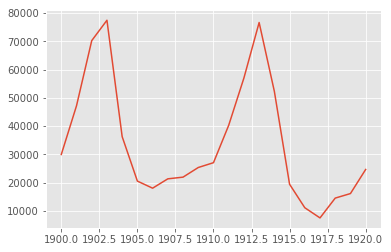

In [57]:
plt.plot(year, hares)

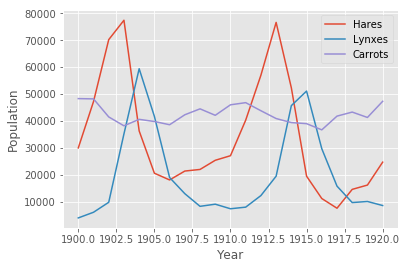

In [59]:
plt.plot(year, hares, label='Hares')
plt.plot(year, lynxes, label='Lynxes')
plt.plot(year, carrots, label='Carrots')
plt.legend( ('Hares','Lynxes','Carrots') )
plt.ylabel('Population')
plt.xlabel('Year')
plt.show()

[35000, 50000, 0, 6]

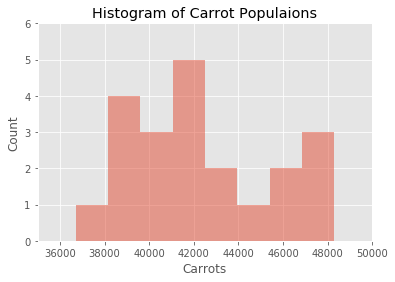

In [60]:
plt.hist(carrots, bins=8, alpha=0.5)
plt.xlabel('Carrots')
plt.ylabel('Count')
plt.title('Histogram of Carrot Populaions')
plt.axis([35000, 50000, 0, 6])
#plt.grid(True)

Text(0.5,1,'Hares v. Carrots')

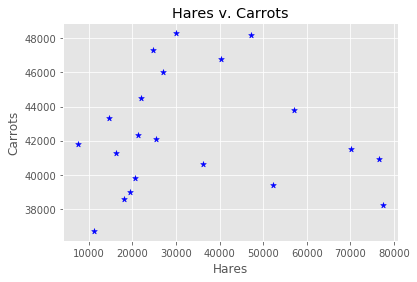

In [61]:
plt.scatter(hares, carrots, color="blue", marker="*")
plt.xlabel('Hares')
plt.ylabel('Carrots')
plt.title('Hares v. Carrots')
#plt.grid(True)

Text(0,0.5,'Lynx Population')

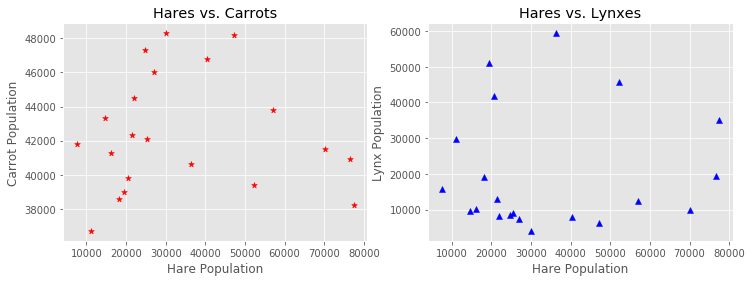

In [62]:
fig = plt.figure(figsize=(12, 4))
# Create an Axes object.

ax1 = fig.add_subplot(1,2,1) # one row, two column, first plot
# Plot the data.
ax1.scatter(hares, carrots, color="red", marker="*")
ax1.set_title("Hares vs. Carrots")
# Add some axis labels.
ax1.set_xlabel("Hare Population")
ax1.set_ylabel("Carrot Population")


ax2 = fig.add_subplot(1,2,2) # one row, two column, 2nd plot
# Plot the data.
ax2.scatter(hares, lynxes, color="blue", marker="^")

ax2.set_title("Hares vs. Lynxes")
# Add some axis labels.
ax2.set_xlabel("Hare Population")
ax2.set_ylabel("Lynx Population")

# Produce an image.
# fig.savefig("scatterplot.png")
